# Tutorial 3: Stereo-seq mouse olfactory bulb

This tutorial demonstrates how to identify spatial domains on Stereo-seq data.

In this tutorial, we foucs on the Stereo-seq mouse olfactory bulb data (https://github.com/JinmiaoChenLab/SEDR_analyses/).

We removed spots outside the main tissue area, and the used spots (h5ad format) can be downloaded from https://zenodo.org/record/8141084.


## Loading package

In [1]:
import os
import torch
import pandas as pd
import scanpy as sc
from sklearn import metrics
import multiprocessing as mp
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from STGMVA.STGMVA import STGMMVE
from STGMVA import read_adata
from STGMVA import mk_dir

2023-07-14 17:09:49.744473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Reading ST data

In [3]:
adata = sc.read("/home/tengliu/Paper6-NC/STGMVA_Tutorials/ST data/Stereo_seq.h5ad") # read data

In [4]:
adata

AnnData object with n_obs × n_vars = 19109 × 14376
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    obsm: 'spatial'

## Create directory for pretrained model

In [5]:
save_path='./results_save/'
section_id = 'Stereo-seq'
mk_dir(save_path,section_id)

## Training the model

STGMVA aims to learn the representations by two-step process. First, pretrained the GMM clustering model. Second, discerned the spatial domains for spatial transcriptomics data. 

After model training, the learned representations will be saved in adata.obsm['embedding'], and can be used for spatial clustering. 

In [6]:
model = STGMMVE(adata, datatype = "Stereo", nCluster=7,save_path=save_path, section_id=section_id)

# model.pretrain() # Train your own pretranined model or use the pretrained model we provided.

adata_res = model.train_cluster()


/home/tengliu/miniconda3/envs/Torch_pyG2.0/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


Graph constructed!


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 5.4.10
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


  0%|          | 0/50 [01:21<?, ?it/s]

Epoch: 0
NMI=0.163726, ARI=0.145773
Loss=95.7221,  ELBO Loss=127.5967


 10%|█         | 5/50 [05:04<37:23, 49.85s/it]  

Epoch: 5
NMI=0.158770, ARI=0.139680
Loss=98.4153,  ELBO Loss=125.1135


 20%|██        | 10/50 [09:14<30:22, 45.56s/it]

Epoch: 10
NMI=0.166472, ARI=0.154732
Loss=99.9330,  ELBO Loss=123.3509


 30%|███       | 15/50 [14:14<38:23, 65.82s/it]

Epoch: 15
NMI=0.168322, ARI=0.150655
Loss=99.8485,  ELBO Loss=121.3690


 40%|████      | 20/50 [18:54<26:14, 52.48s/it]

Epoch: 20
NMI=0.159620, ARI=0.135420
Loss=100.4081,  ELBO Loss=120.8027


 50%|█████     | 25/50 [24:24<29:30, 70.80s/it]

Epoch: 25
NMI=0.164703, ARI=0.154648
Loss=100.0572,  ELBO Loss=119.8308


 60%|██████    | 30/50 [29:53<19:37, 58.87s/it]

Epoch: 30
NMI=0.172312, ARI=0.162355
Loss=99.4193,  ELBO Loss=118.8239


 70%|███████   | 35/50 [34:52<16:27, 65.86s/it]

Epoch: 35
NMI=0.168259, ARI=0.158616
Loss=98.9600,  ELBO Loss=117.9697


 80%|████████  | 40/50 [41:23<11:07, 66.79s/it]

Epoch: 40
NMI=0.184402, ARI=0.176945
Loss=99.6982,  ELBO Loss=118.3145


 90%|█████████ | 45/50 [47:15<06:11, 74.24s/it]

Epoch: 45
NMI=0.176820, ARI=0.164544
Loss=99.4441,  ELBO Loss=117.7080


100%|██████████| 50/50 [51:48<00:00, 62.18s/it]


In [7]:
adata_res

AnnData object with n_obs × n_vars = 19109 × 14376
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pre_label'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'mclust_labels', 'ari_list', 'loss'
    obsm: 'spatial', 'graph_neigh', 'adj', 'feat_mat', 'embedding'

## Visualization

/home/tengliu/miniconda3/envs/Torch_pyG2.0/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


(6005.190789473684, 12428.6600877193, 9986.774763741741, 15062.302776957435)

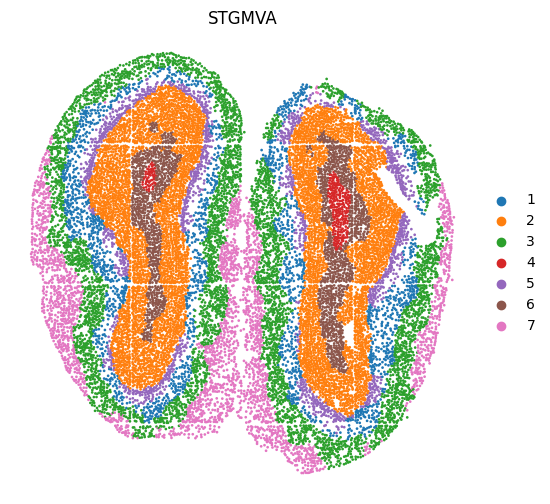

In [8]:
plt.rcParams["figure.figsize"] = (6, 6)
sc.pl.embedding(adata_res, basis="spatial", color="pre_label",s=15, show=False, title='STGMVA')
plt.axis('off')

/home/tengliu/miniconda3/envs/Torch_pyG2.0/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/tengliu/miniconda3/envs/Torch_pyG2.0/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'Predicted labels'}, xlabel='UMAP1', ylabel='UMAP2'>

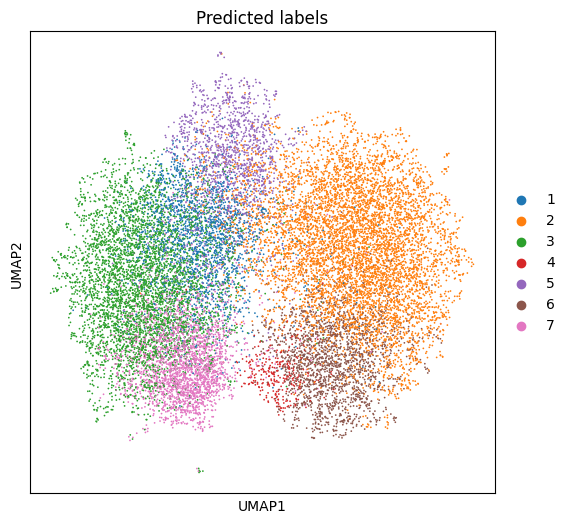

In [9]:
# plotting predicted labels by UMAP
sc.pp.neighbors(adata_res, use_rep='embedding', n_neighbors=10)
sc.tl.umap(adata_res)
sc.pl.umap(adata_res, color='pre_label', title=['Predicted labels'], show=False)